# Import Function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import reciprocal, uniform
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, average_precision_score, precision_recall_curve, auc

# Call File

In [2]:
user_behavior = pd.read_csv('user_behavior_final.csv', low_memory=False)
july_user_behavior= pd.read_csv('june13-july13_user_behavior.csv', low_memory=False)

**Tranform the data "Churn Column"**


In [3]:
user_behavior

,iduser,paid_user,streak_count,hero_area>1,battle_count,file_count,num_items,mission_count,wardrobe_updated,wordcount,friends_amount,chat_count
0,1,1,0,0,0,0,0,0,0,0,0,0
1,28032,1,0,0,11,4,19,4,0,6835,0,0
2,14,0,0,0,0,0,0,0,0,0,0,0
3,24455,0,0,0,0,1,2,0,0,0,0,0
4,24369,1,0,0,47,12,30,24,1,11981,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48978,50531,0,0,0,1,2,7,0,0,21,0,0
48979,50532,0,1,0,10,5,20,0,0,10949,0,0
48980,50533,0,0,0,1,2,7,1,0,27,0,0
48981,50534,0,1,0,3,2,10,2,0,221,0,0


In [4]:
# Replace column name
user_behavior = user_behavior.rename(columns={'paid_user': 'churn'})

# Replace 0 with 1 and 1 with 0 in the 'churn' column
user_behavior['churn'] = user_behavior['churn'].replace({0: 1, 1: 0})

user_behavior

,iduser,churn,streak_count,hero_area>1,battle_count,file_count,num_items,mission_count,wardrobe_updated,wordcount,friends_amount,chat_count
0,1,0,0,0,0,0,0,0,0,0,0,0
1,28032,0,0,0,11,4,19,4,0,6835,0,0
2,14,1,0,0,0,0,0,0,0,0,0,0
3,24455,1,0,0,0,1,2,0,0,0,0,0
4,24369,0,0,0,47,12,30,24,1,11981,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48978,50531,1,0,0,1,2,7,0,0,21,0,0
48979,50532,1,1,0,10,5,20,0,0,10949,0,0
48980,50533,1,0,0,1,2,7,1,0,27,0,0
48981,50534,1,1,0,3,2,10,2,0,221,0,0


# EDA

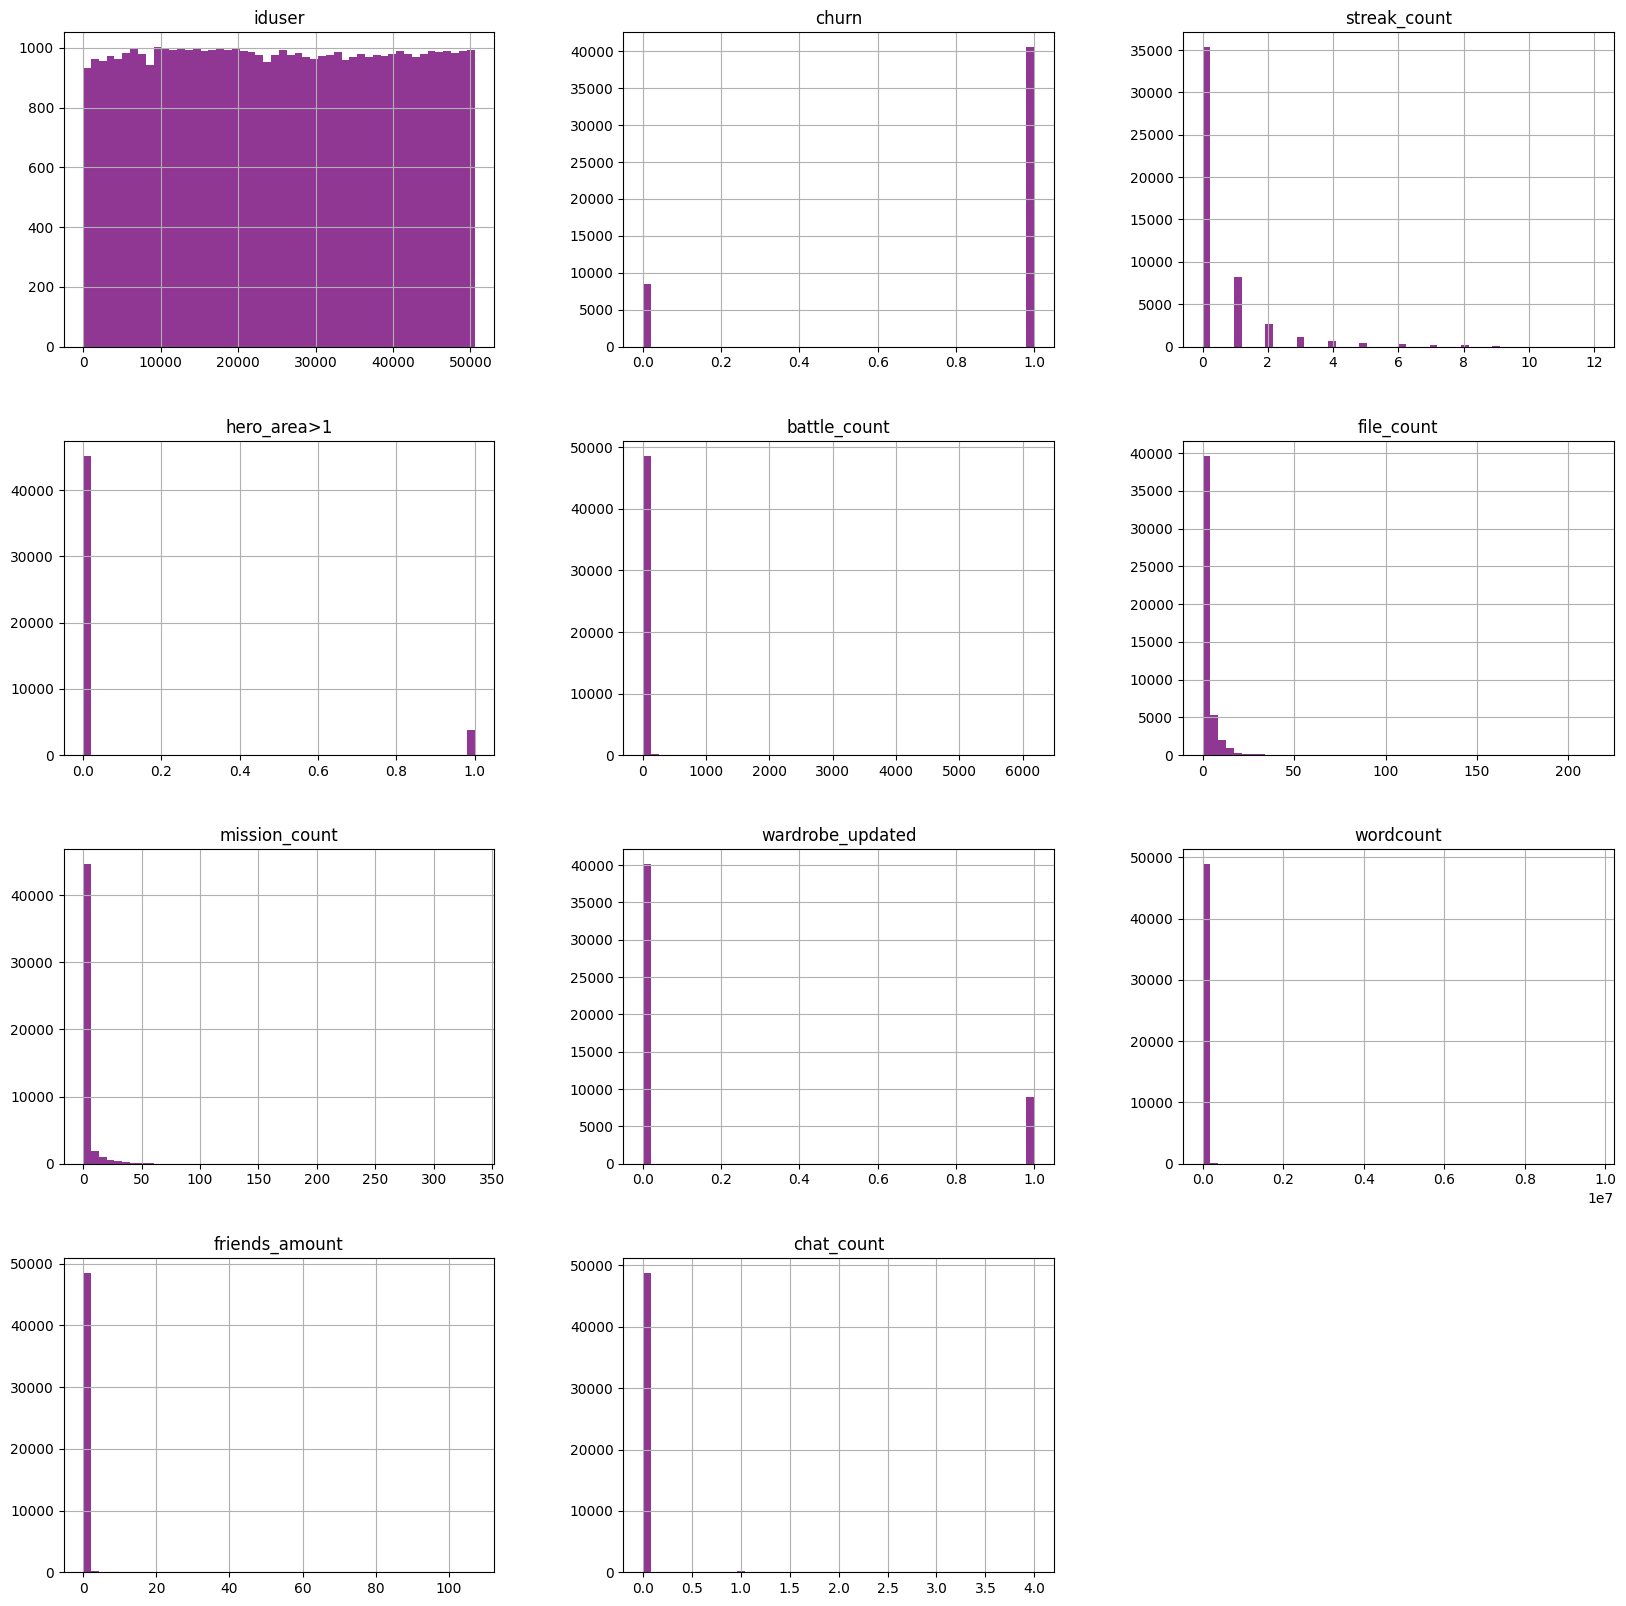

In [43]:
user_behavior.hist(bins= 50, figsize=(20,20), color='#903794')
#save file
plt.savefig('skewed.png')
plt.show()

In [6]:
user_behavior.describe().round(2)

,iduser,churn,streak_count,hero_area>1,battle_count,file_count,num_items,mission_count,wardrobe_updated,wordcount,friends_amount,chat_count
count,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00
mean,25295.97,0.83,0.53,0.08,10.26,3.45,9.65,2.10,0.18,6252.80,0.12,0.00
std,14569.15,0.38,1.17,0.27,52.51,5.45,11.72,7.67,0.39,67530.17,1.07,0.08
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12701.50,1.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,25240.00,1.00,0.00,0.00,1.00,2.00,5.00,0.00,0.00,266.00,0.00,0.00
75%,37938.50,1.00,1.00,0.00,8.00,3.00,14.00,0.00,0.00,3453.50,0.00,0.00
max,50535.00,1.00,12.00,1.00,6185.00,214.00,202.00,335.00,1.00,9715531.00,107.00,4.00


## Check Correlation Matrix

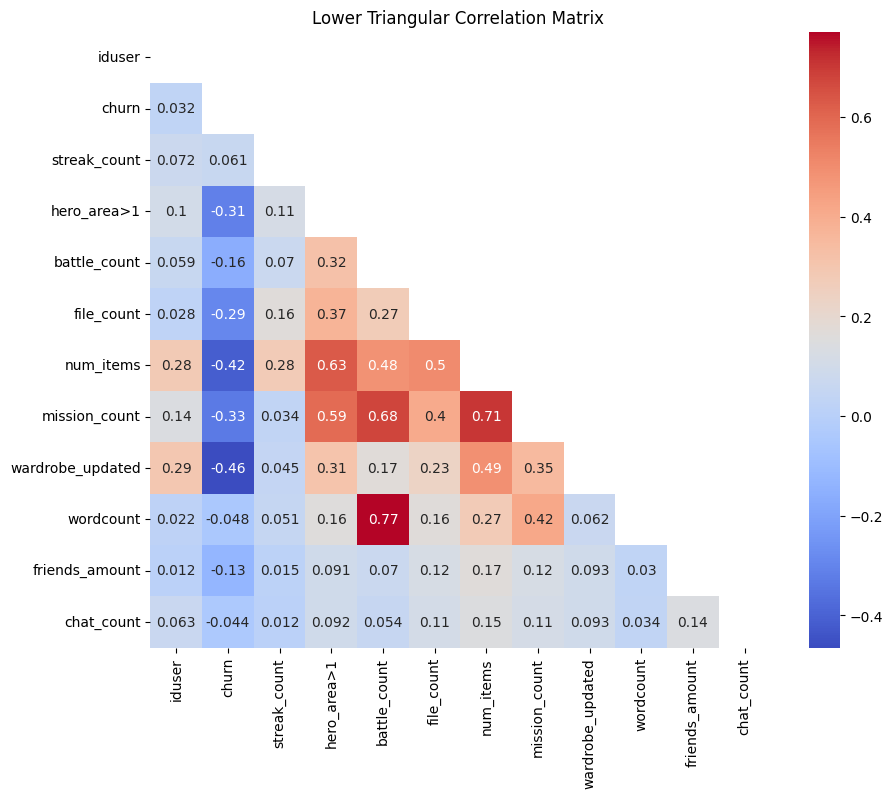

In [7]:
# Compute the correlation matrix
corr_matrix = user_behavior.corr()

# Create a mask to hide the upper triangular part of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Visualize the lower triangular part of the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Lower Triangular Correlation Matrix ')
# Save the heatmap as an image
plt.show()


In [8]:
# Calculate the VIF scores
vif = pd.DataFrame()
vif["Feature"] = user_behavior.columns
vif["VIF Score"] = [variance_inflation_factor(user_behavior.values, i) for i in range(user_behavior.shape[1])]

# Print the VIF scores
print(vif)

             Feature  VIF Score
0             iduser   4.610919
1              churn   3.337196
2       streak_count   1.438091
3        hero_area>1   2.000543
4       battle_count   4.190796
5         file_count   1.865816
6          num_items   5.697546
7      mission_count   3.586429
8   wardrobe_updated   1.849511
9          wordcount   2.629728
10    friends_amount   1.063740
11        chat_count   1.042952


In [9]:
# drop high correlation and less important column
columns_to_drop = ['num_items']
user_behavior = user_behavior.drop(columns_to_drop, axis=1)

In [10]:
# Calculate the VIF scores
vif = pd.DataFrame()
vif["Feature"] = user_behavior.columns
vif["VIF Score"] = [variance_inflation_factor(user_behavior.values, i) for i in range(user_behavior.shape[1])]

# Print the VIF scores
print(vif)

             Feature  VIF Score
0             iduser   4.128869
1              churn   3.336159
2       streak_count   1.282173
3        hero_area>1   1.798130
4       battle_count   4.151927
5         file_count   1.700704
6      mission_count   3.157063
7   wardrobe_updated   1.712716
8          wordcount   2.623294
9     friends_amount   1.054770
10        chat_count   1.040744


## Split Data to Training, Validation, and Testing Set

In [11]:
X = user_behavior.drop('churn', axis=1)
y = user_behavior['churn']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=52)


# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (24001, 10)
y_train shape: (24001,)
X_val shape: (10287, 10)
y_val shape: (10287,)
X_test shape: (14695, 10)
y_test shape: (14695,)


## Fix Data Imbalance - SMOTE

In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [13]:
print("Original shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nResampled shapes:")
print("X_train_resampled:", X_train_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)


Original shapes:
X_train: (24001, 10)
y_train: (24001,)

Resampled shapes:
X_train_resampled: (39708, 10)
y_train_resampled: (39708,)


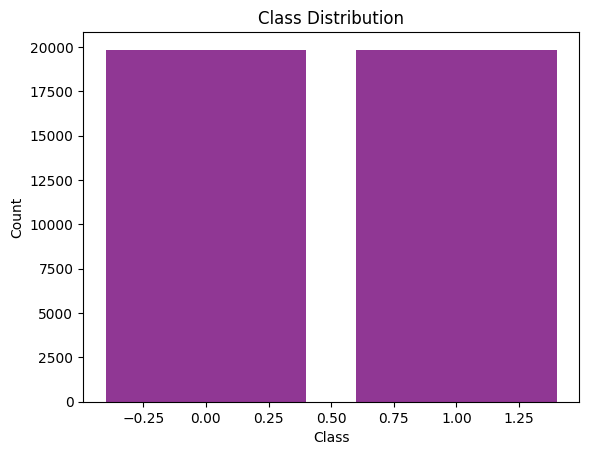

Class 0: 50.00%
Class 1: 50.00%
Imbalance ratio: 1.00
Imbalance ratio corrected: 1.00


In [45]:


# Count occurrences of each class
class_counts = np.bincount(y_train_resampled)

# Plot class distribution
plt.bar(range(len(class_counts)), class_counts, color ="#903794")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.savefig('class.png')
plt.show()

# Compute class proportions
class_proportions = class_counts / len(y_train_resampled)

# Print class proportions
for i, proportion in enumerate(class_proportions):
    print(f"Class {i}: {proportion * 100:.2f}%")

# Calculate imbalance metrics
imbalance_ratio = np.max(class_counts) / np.min(class_counts)
imbalance_ratio_corrected = np.sum(class_counts) / (len(class_counts) * np.min(class_counts))

print(f"Imbalance ratio: {imbalance_ratio:.2f}")
print(f"Imbalance ratio corrected: {imbalance_ratio_corrected:.2f}")


**Define Function**

In [15]:
def print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, best_params):
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    # Print the accuracy scores and best parameters
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Best Parameters:", best_params)

def evaluate_model(y_val, y_pred_val):
    # Generate the confusion matrix
    cm = confusion_matrix(y_val, y_pred_val)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Generate classification report
    print("Classification Report for Validation Set:")
    print(classification_report(y_val, y_pred_val))

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend()

    # Calculate the difference between training and validation accuracies
    train_accuracy = np.mean(train_scores[-1])
    val_accuracy = np.mean(val_scores[-1])
    accuracy_diff = train_accuracy - val_accuracy

    # Print if the model is overfitting or not
    if accuracy_diff > 0.1:  # Set a threshold value for the difference
        print("The model is likely overfitting.")
    else:
        print("The model is not overfitting.")

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()




def plot_precision_recall_curve(models, X_train_resampled, y_train_resampled, X_val, y_val):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        y_scores_train = model.predict_proba(X_train_resampled)[:, 1]
        y_scores_val = model.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_train_resampled, y_scores_train)
        average_precision = average_precision_score(y_train_resampled, y_scores_train)
        plt.plot(recall, precision, label=f'{model_name} (Avg Precision = {average_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


**Models + Grid Search**

**Further Parameter Tune**

**Decision Tree**

# Decision Tree

## DT Parameter Tune

Training Accuracy: 0.8758940263926664
Validation Accuracy: 0.8661417322834646
Best Parameters: {'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


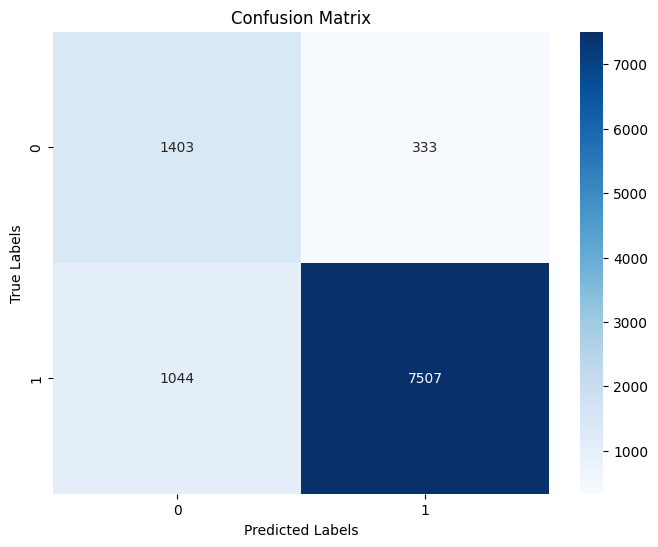

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67      1736
           1       0.96      0.88      0.92      8551

    accuracy                           0.87     10287
   macro avg       0.77      0.84      0.79     10287
weighted avg       0.89      0.87      0.87     10287



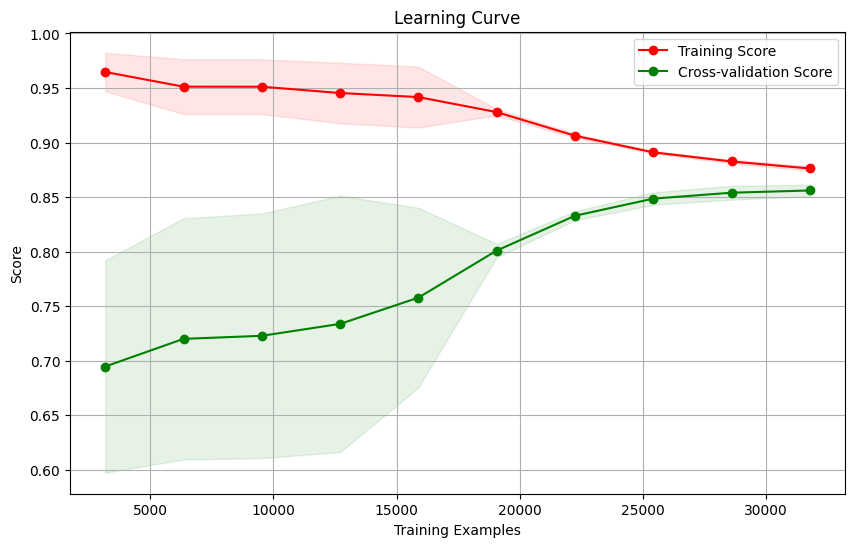

In [16]:
# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', DecisionTreeClassifier())  # Decision Tree Classifier
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__max_depth': [None, 3, 5, 7, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}



# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
dt_best_model = grid_search.best_estimator_

# Generate predictions for training and validation sets
y_pred_train = dt_best_model.predict(X_train_resampled)
y_pred_val = dt_best_model.predict(X_val)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(dt_best_model, X_train_resampled, y_train_resampled)

**Random Forest**

**Random Forest (Grid search)**


Training Accuracy: 0.9451244081797119
Validation Accuracy: 0.8768348400894332
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2}


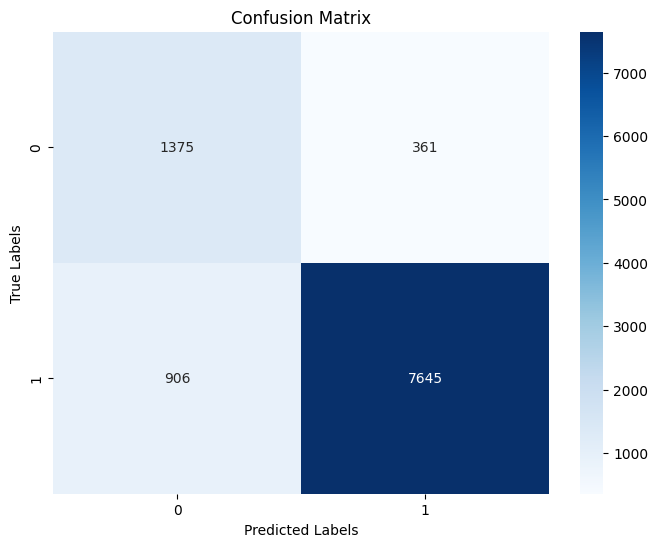

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      1736
           1       0.95      0.89      0.92      8551

    accuracy                           0.88     10287
   macro avg       0.78      0.84      0.80     10287
weighted avg       0.90      0.88      0.88     10287



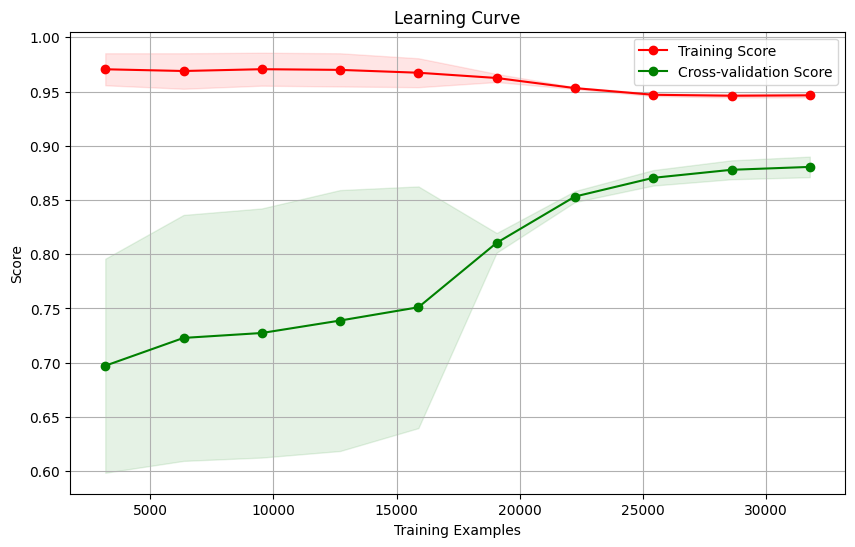

In [17]:
# Create an instance of Random Forest Classifier
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Set up grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

# Fit the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_params = grid_search.best_params_
rf_grid_best_model = grid_search.best_estimator_

# Generate predictions for training and validation sets
y_pred_train = rf_grid_best_model.predict(X_train_resampled)
y_pred_val = rf_grid_best_model.predict(X_val)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(rf_grid_best_model,X_train_resampled, y_train_resampled)

**Random Forest (RandomSearch)**


Training Accuracy: 0.9427571270272993
Validation Accuracy: 0.8731408573928259
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2}


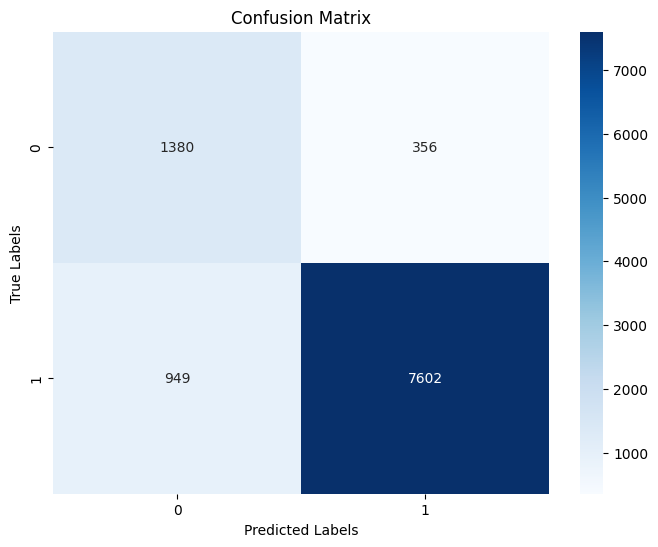

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.59      0.79      0.68      1736
           1       0.96      0.89      0.92      8551

    accuracy                           0.87     10287
   macro avg       0.77      0.84      0.80     10287
weighted avg       0.89      0.87      0.88     10287



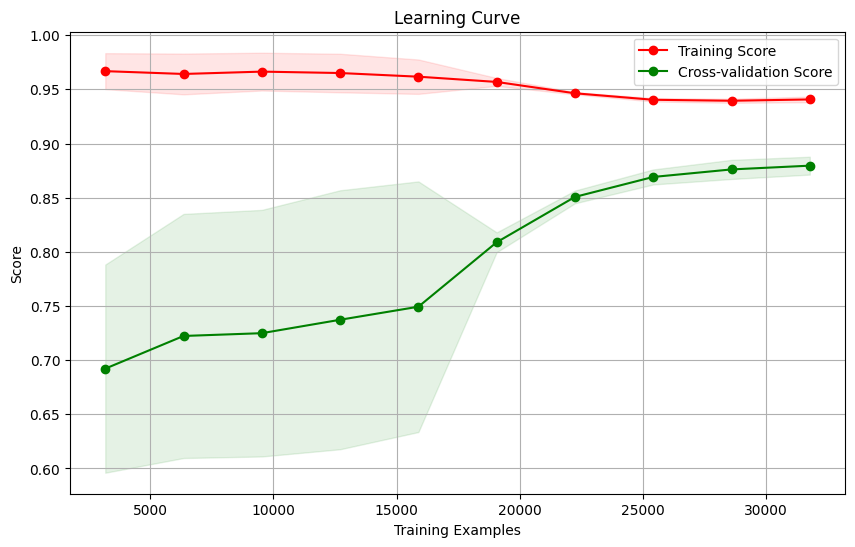

In [18]:
# Create an instance of Random Forest Classifier
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Set up random search with early stopping
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5),
    random_state=42,
    n_jobs=-1  # Utilize all available CPU cores
)

# Fit the random search on the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_params = random_search.best_params_
rf_random_best_model = random_search.best_estimator_

# Generate predictions for training and validation sets
y_pred_train = rf_random_best_model.predict(X_train_resampled)
y_pred_val = rf_random_best_model.predict(X_val)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(rf_random_best_model, X_train_resampled, y_train_resampled)

**Logistic Regression**


Training Accuracy: 0.7846781504986401
Validation Accuracy: 0.8538932633420823
Best Parameters: {'C': 2.7696556516386703, 'class_weight': None, 'solver': 'liblinear'}


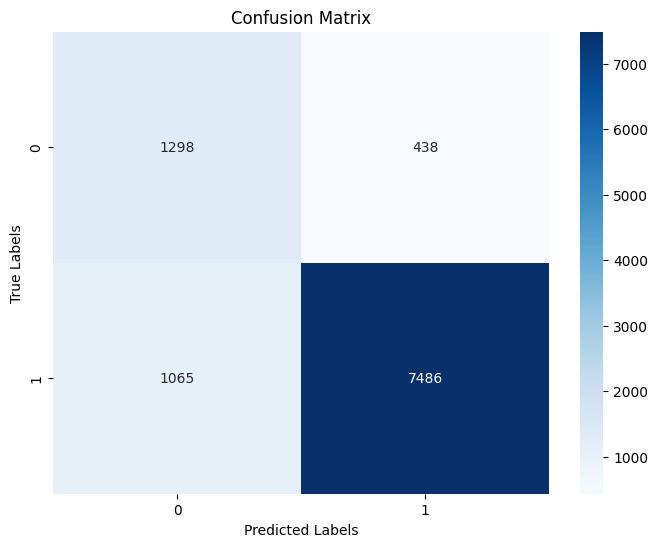

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1736
           1       0.94      0.88      0.91      8551

    accuracy                           0.85     10287
   macro avg       0.75      0.81      0.77     10287
weighted avg       0.88      0.85      0.86     10287



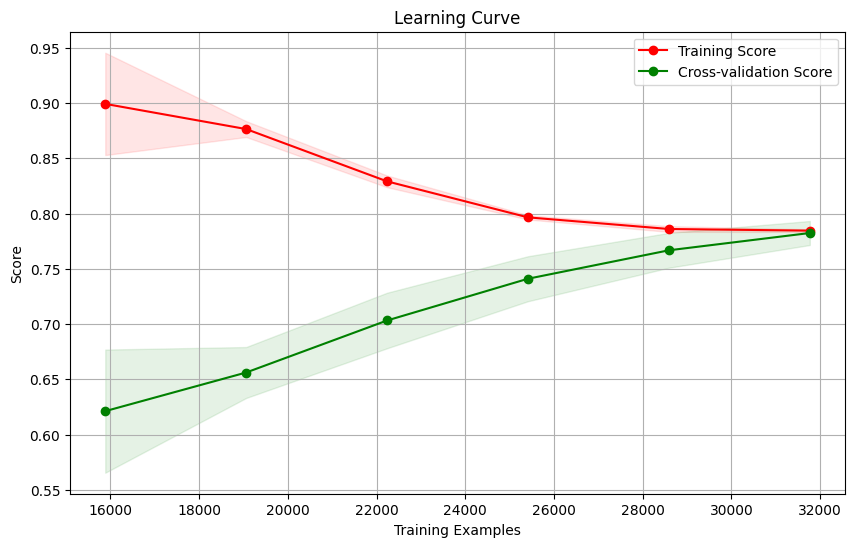

In [19]:
# Create an instance of Logistic Regression
model = LogisticRegression(max_iter=2000, penalty='l2')

# Define the hyperparameters grid
param_grid = {
    'C': np.random.uniform(0.001, 100, 10),
    'class_weight': [None, {0: 1, 1: 5}],  # Adjusting class weights, giving higher weight to category 1
    'solver': ['liblinear', 'newton-cg', 'lbfgs']  # Try different solvers
}

# Perform feature scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model and its hyperparameters
lg_l2_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Generate predictions for the validation set using the best model
y_pred_train = lg_l2_best_model.predict(X_train_scaled)
y_pred_val = lg_l2_best_model.predict(X_val_scaled)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(lg_l2_best_model, X_train_scaled, y_train_resampled)


Training Accuracy: 0.7846529666565931
Validation Accuracy: 0.8542821036259356
Best Parameters: {'C': 99.83086525779704, 'class_weight': None, 'solver': 'liblinear'}


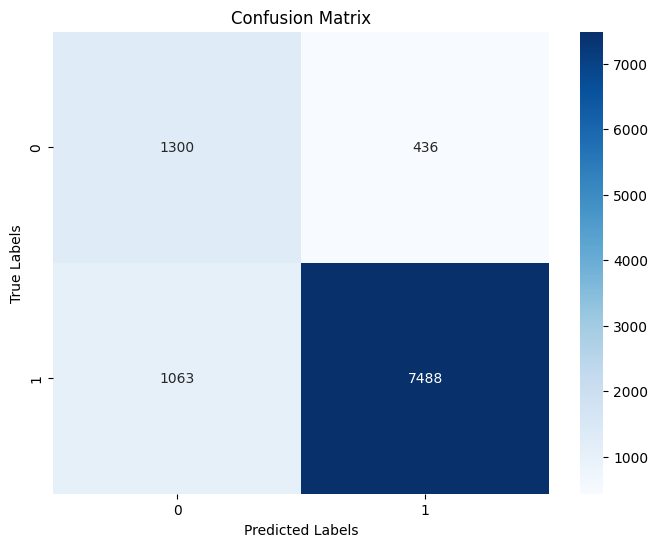

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1736
           1       0.94      0.88      0.91      8551

    accuracy                           0.85     10287
   macro avg       0.75      0.81      0.77     10287
weighted avg       0.88      0.85      0.86     10287



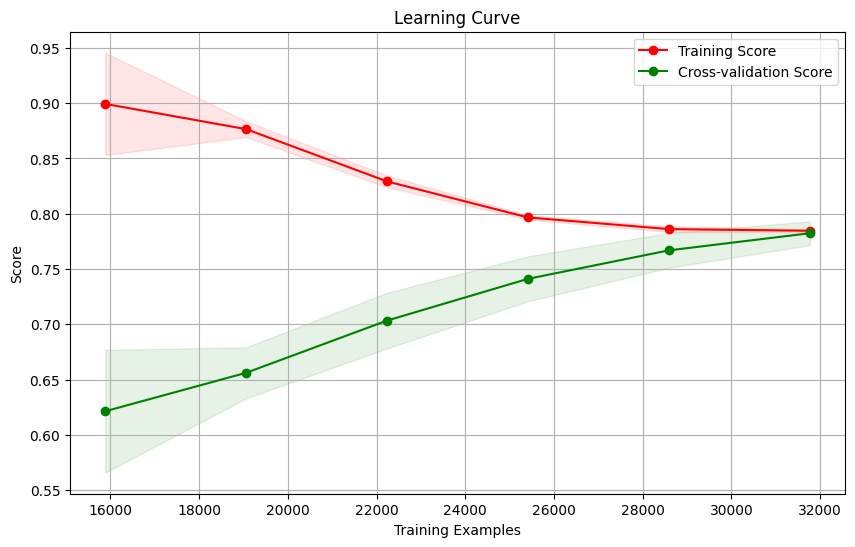

In [20]:

# Create an instance of Logistic Regression
model = LogisticRegression(max_iter=2000, penalty='l1')

# Define the hyperparameters grid
param_grid = {
    'C': np.random.uniform(0.001, 100, 10),
    'class_weight': [None, {0: 1, 1: 5}],  # Adjusting class weights, giving higher weight to category 1
    'solver': ['liblinear', 'saga']  # Try different solvers
}


# Perform feature scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model and its hyperparameters
lg_l1_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Generate predictions for the validation set using the best model
y_pred_train = lg_l1_best_model.predict(X_train_scaled)
y_pred_val = lg_l1_best_model.predict(X_val_scaled)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(lg_l1_best_model, X_train_scaled, y_train_resampled)

**Naive Bayes**

Training Accuracy: 0.6769416742218193
Validation Accuracy: 0.8534072129872655
Best Parameters: {'var_smoothing': 1e-08}


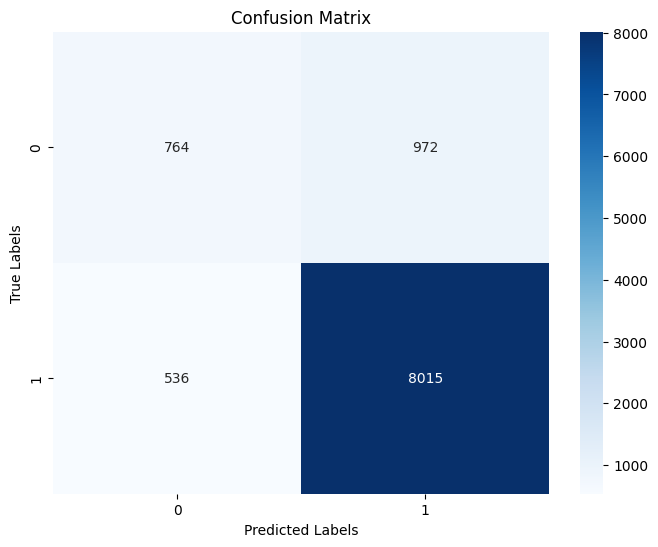

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.59      0.44      0.50      1736
           1       0.89      0.94      0.91      8551

    accuracy                           0.85     10287
   macro avg       0.74      0.69      0.71     10287
weighted avg       0.84      0.85      0.84     10287



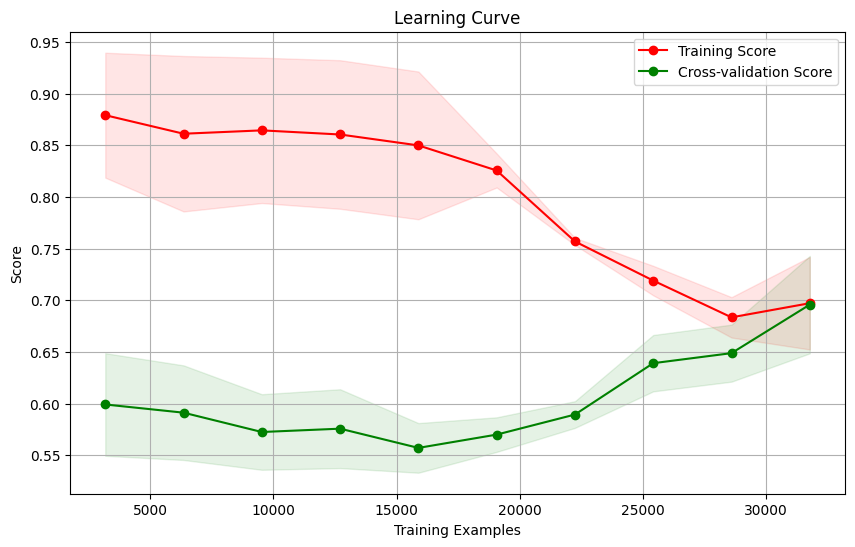

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create an instance of Gaussian Naive Bayes classifier
model = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best parameters to create a new model
nb_best_model = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Fit the new model on the training data
nb_best_model.fit(X_train_resampled, y_train_resampled)

# Generate predictions for the validation set
y_pred_val = nb_best_model.predict(X_val)

# Generate predictions for training and validation sets
y_pred_train = nb_best_model.predict(X_train_resampled)
y_pred_val = nb_best_model.predict(X_val)

print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(nb_best_model, X_train_resampled, y_train_resampled)


**SVM**

Best Hyperparameters: {'calibrated_svc__estimator__C': 1, 'calibrated_svc__estimator__dual': False, 'calibrated_svc__estimator__loss': 'squared_hinge', 'calibrated_svc__estimator__penalty': 'l2'}
Training Accuracy: 0.7687871461670193
Validation Accuracy: 0.84
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61      1736
           1       0.94      0.86      0.90      8551

    accuracy                           0.84     10287
   macro avg       0.73      0.80      0.75     10287
weighted avg       0.87      0.84      0.85     10287

Training Accuracy: 0.7687871461670193
Validation Accuracy: 0.838631282200836
Best Parameters: {'calibrated_svc__estimator__C': 1, 'calibrated_svc__estimator__dual': False, 'calibrated_svc__estimator__loss': 'squared_hinge', 'calibrated_svc__estimator__penalty': 'l2'}


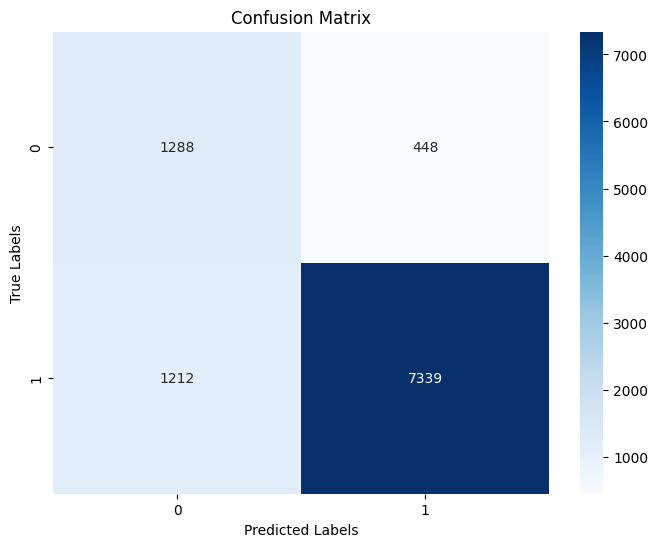

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61      1736
           1       0.94      0.86      0.90      8551

    accuracy                           0.84     10287
   macro avg       0.73      0.80      0.75     10287
weighted avg       0.87      0.84      0.85     10287



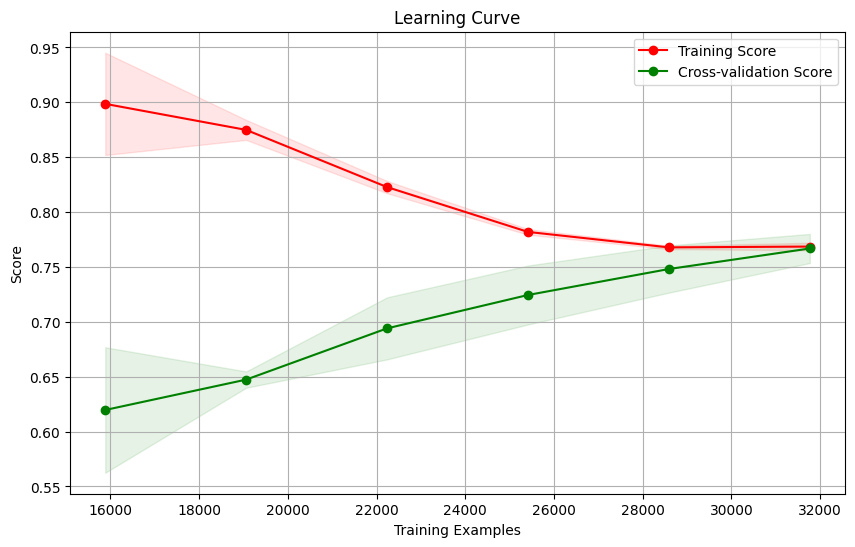

In [22]:

# Define the hyperparameters to tune
param_grid = {
    'calibrated_svc__estimator__C': [1, 10],
    'calibrated_svc__estimator__penalty': ['l2'],
    'calibrated_svc__estimator__loss': ['squared_hinge'],
    'calibrated_svc__estimator__dual': [False]
}


# Create a pipeline for feature scaling and LinearSVC with CalibratedClassifierCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('calibrated_svc', CalibratedClassifierCV(LinearSVC(max_iter=10000)))  # Calibrated LinearSVC model
])

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and its hyperparameters
svm_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
svm_best_model.fit(X_train_resampled, y_train_resampled)

# Generate predictions for training and validation sets using the best model
y_pred_train = svm_best_model.predict(X_train_resampled)
y_pred_val = svm_best_model.predict(X_val)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val).round(2)

# Print the best hyperparameters and accuracy scores
print("Best Hyperparameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Generate classification report
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))


print_accuracy_scores(y_train_resampled, y_pred_train, y_val, y_pred_val, grid_search.best_params_)
evaluate_model(y_val, y_pred_val)
plot_learning_curve(svm_best_model, X_train_resampled, y_train_resampled)


In [23]:
models = {
    'Decision Tree': dt_best_model,
    'Random Forest (GridSearch)': rf_grid_best_model,
    'Random Forest (RandomizedSearch)': rf_random_best_model,
    'Logistic Regression (L2)': lg_l2_best_model,
    'Logistic Regression (L1)': lg_l1_best_model,
    'Naive Bayes': nb_best_model,
    'Support Vector Machine': svm_best_model
}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


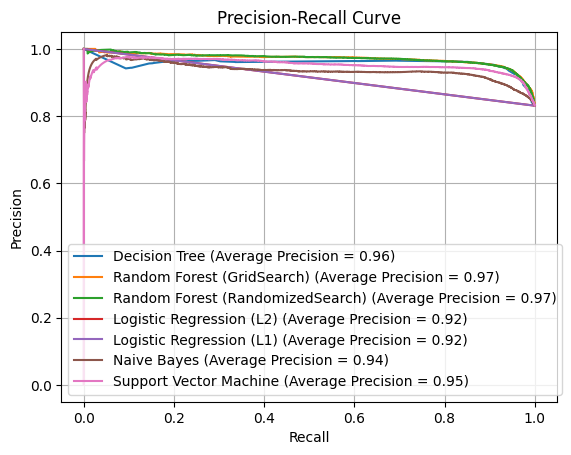

In [24]:
# Assuming your models have a `predict_proba` method that returns probabilities
for model_name, model in models.items():
    y_score = model.predict_proba(X_val)[:, 1]  # Probability of the positive class
    precision, recall, _ = precision_recall_curve(y_val, y_score)
    average_precision = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (Average Precision = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**Testing Set Accuracy on Each Model**

In [25]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision'])

# Iterate over the models and test them
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Append the results to the DataFrame
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
print(results_df)

                              Model  Accuracy    Recall  Precision
0                     Decision Tree  0.868050  0.881311   0.955528
1        Random Forest (GridSearch)  0.880095  0.898773   0.953429
2  Random Forest (RandomizedSearch)  0.875604  0.893584   0.952921
3          Logistic Regression (L2)  0.826199  1.000000   0.826199
4          Logistic Regression (L1)  0.826199  1.000000   0.826199
5                       Naive Bayes  0.855325  0.943415   0.888389
6            Support Vector Machine  0.845934  0.867803   0.941134


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


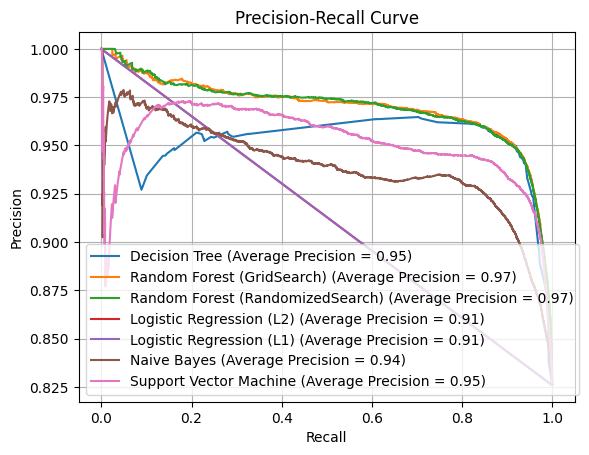

In [26]:


# Plot the PR curves for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = auc(recall, precision)


    plt.plot(recall, precision, label=f'{model_name} (Average Precision = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


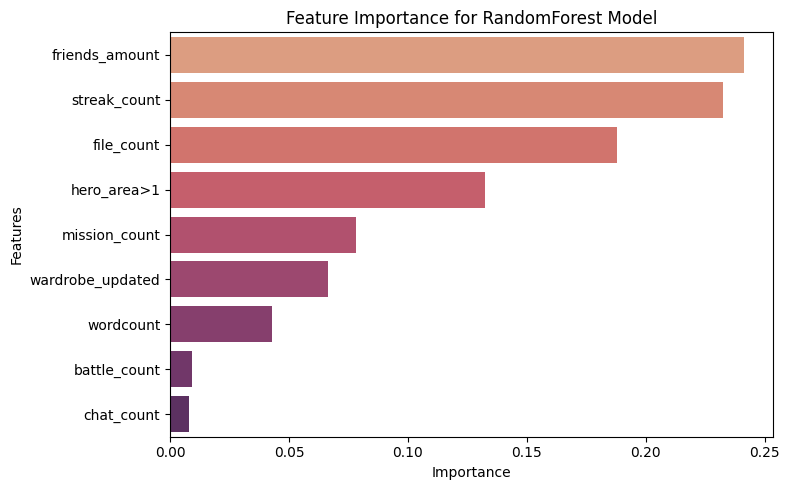

array([0.23259271, 0.13255368, 0.0094297 , 0.18804779, 0.07835569,
       0.06651497, 0.04274995, 0.24114158, 0.00814693, 0.000467  ])

In [58]:

feature_names = X.columns.drop('iduser')

# Access the feature importance attribute
feature_importance = rf_grid_best_model.feature_importances_

# Create a dictionary to store the feature importance with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted feature names and importances as lists
sorted_feature_names, sorted_importance = zip(*sorted_feature_importance)
sorted_feature_names = list(sorted_feature_names)
sorted_importance = list(sorted_importance)

# Create a bar graph to visualize the feature importances using seaborn with the custom color palette
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importance, y=sorted_feature_names, palette= "flare")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForest Model')
plt.tight_layout()
plt.show()
feature_importance

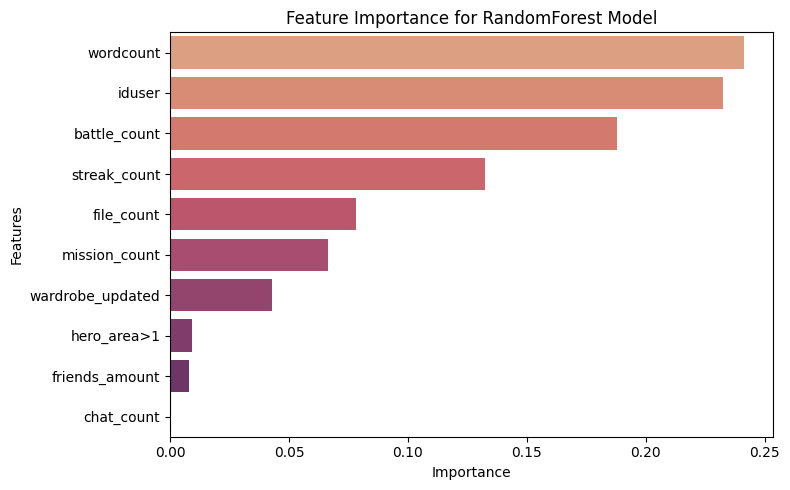

array([0.23259271, 0.13255368, 0.0094297 , 0.18804779, 0.07835569,
       0.06651497, 0.04274995, 0.24114158, 0.00814693, 0.000467  ])

In [59]:
feature_names = X.columns

# Access the feature importance attribute
feature_importance = rf_grid_best_model.feature_importances_

# Create a dictionary to store the feature importance with their corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted feature names and importances as lists
sorted_feature_names, sorted_importance = zip(*sorted_feature_importance)
sorted_feature_names = list(sorted_feature_names)
sorted_importance = list(sorted_importance)

# Create a bar graph to visualize the feature importances using seaborn with the custom color palette
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importance, y=sorted_feature_names, palette= "flare")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForest Model')
plt.tight_layout()
plt.show()
feature_importance

In [27]:
# # Predict churn labels for the testing set
# churn_predictions = rf_grid_best_model.predict(july_user_behavior)

# # Create a DataFrame with user ids and churn predictions
# churn_table = pd.DataFrame({'User ID': july_user_behavior['iduser'], 'Churn Prediction': churn_predictions})

# # Dictionary containing additional features
# additional_features = {
#     'streak_count': july_user_behavior['streak_count'],
#     'hero_area>1': july_user_behavior['hero_area>1'],
#     'battle_count': july_user_behavior['battle_count'],
#     'file_count': july_user_behavior['file_count'],
#     'mission_count': july_user_behavior['mission_count'],
#     'wardrobe_updated': july_user_behavior['wardrobe_updated'],
#     'wordcount': july_user_behavior['wordcount'],
#     'friends_amount': july_user_behavior['friends_amount'],
#     'chat_count': july_user_behavior['chat_count']
#     # Add more features as needed
# }

# # Add additional features to the churn table
# for feature_name, feature_values in additional_features.items():
#     churn_table[feature_name] = feature_values

# # Print the churn table
# print(churn_table)

# # Export churn table as an Excel file
# churn_table.to_excel('churn_table.xlsx', index=False)